You should have the following file structure for this notebook to get started:
    
```bash
bia6304-assignment4/
├── assignment
│   ├── __init__.py
│   ├── assignment4.py
│   ├── config.py
│   └── data
│       ├── __init__.py
│       ├── io.py
│       ├── lda.py
│       └── sampling.py
├── main.ipynb
├── pyproject.toml
├── README.md
└── wikipedia-summary-128k.tsv
```

If that isn't what you see, then you should consult the [README.md](./README.md) file in the root directory.

wikipedia-summary-128k.tsv can be downloaded from https://huggingface.co/datasets/mbukowski/wikipedia-summary-dataset-128k/resolve/main/wikipedia-summary-128k.tsv

To begin, we will initialize our logging system, and define our configuration.

In [1]:
import logging
import os
import sys

# Configure the logger
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
    datefmt='%Y-%m-%d %H:%M:%S',
    stream=sys.stdout  # This will make the logger output to the notebook
)

# Create a logger instance
logger = logging.getLogger(__name__)

# Now you can use the logger throughout your notebook
logger.info("Logging is set up and ready to go!")

# Add the root folder to sys.path, in case it's not already there
root_folder = os.getcwd()
sys.path.append(root_folder)
logger.info(f"Added {root_folder} to sys.path")


2024-09-19 12:40:28 - __main__ - INFO - Logging is set up and ready to go!
2024-09-19 12:40:28 - __main__ - INFO - Added /Users/mbukowski/class/BIA6304/assignments/bia6304-assignment4 to sys.path


In [2]:
from assignment.assignment4 import Config

config = Config(
    "wikipedia-summary-128k.tsv",
    "processed-data.tsv",
    target_sample_size=1024, # start with something small
    random_seed=42,
    num_lda_topics=20,
    num_lda_passes=10,
)

2024-09-19 12:40:37 - numexpr.utils - INFO - NumExpr defaulting to 12 threads.


The first step of the assignment is to implement the subsampler pipeline.

In [3]:
from assignment.assignment4 import subsampler_pipeline

subsampler_pipeline(config)

2024-09-19 12:29:18 - assignment.data.io - INFO - Dataset loaded successfully. 128001 entries.
2024-09-19 12:29:21 - assignment.data.sampling - INFO - Subsampling completed. New shape: 1024
2024-09-19 12:29:22 - assignment.data.io - INFO - Processed data saved successfully to processed-data.tsv


In [4]:
from assignment.data.io import load_processed_data

subsampled_data = load_processed_data(config.sampled_output_path)
subsampled_data.shape[0].compute()

2024-09-19 12:29:22 - assignment.data.io - INFO - Processed data loaded successfully from processed-data.tsv


1024

In [5]:
from assignment.assignment4 import lda_topic_model

lda_model, dictionary, bow_corpus = lda_topic_model(config, subsampled_data)

2024-09-19 12:29:22 - gensim.corpora.dictionary - INFO - adding document #0 to Dictionary<0 unique tokens: []>
2024-09-19 12:29:22 - gensim.corpora.dictionary - INFO - built Dictionary<12660 unique tokens: ['bertinis', 'book', 'century', 'die', 'end']...> from 1024 documents (total 39537 corpus positions)
2024-09-19 12:29:22 - gensim.utils - INFO - Dictionary lifecycle event {'msg': "built Dictionary<12660 unique tokens: ['bertinis', 'book', 'century', 'die', 'end']...> from 1024 documents (total 39537 corpus positions)", 'datetime': '2024-09-19T12:29:22.658708', 'gensim': '4.3.3', 'python': '3.12.3 (main, Apr  9 2024, 08:09:14) [Clang 15.0.0 (clang-1500.3.9.4)]', 'platform': 'macOS-14.6.1-x86_64-i386-64bit', 'event': 'created'}
2024-09-19 12:29:22 - gensim.models.ldamodel - INFO - using symmetric alpha at 0.05
2024-09-19 12:29:22 - gensim.models.ldamodel - INFO - using symmetric eta at 0.05
2024-09-19 12:29:22 - gensim.models.ldamodel - INFO - using serial LDA version on this node
202

In [6]:
from gensim.models import LdaModel

def print_topics(lda_model: LdaModel):
    # Print the topics
    for idx, topic in lda_model.print_topics(-1):
        print(f"Topic: {idx}")
        print(topic)
        print()

print_topics(lda_model)

2024-09-19 12:29:28 - gensim.models.ldamodel - INFO - topic #0 (0.050): 0.009*"music" + 0.006*"born" + 0.005*"known" + 0.004*"american" + 0.004*"people" + 0.003*"album" + 0.003*"football" + 0.003*"new" + 0.003*"north" + 0.003*"group"
2024-09-19 12:29:28 - gensim.models.ldamodel - INFO - topic #1 (0.050): 0.016*"mi" + 0.012*"district" + 0.010*"north" + 0.009*"east" + 0.009*"area" + 0.008*"kilometres" + 0.007*"south" + 0.007*"municipality" + 0.007*"west" + 0.006*"county"
2024-09-19 12:29:28 - gensim.models.ldamodel - INFO - topic #2 (0.050): 0.008*"football" + 0.006*"played" + 0.005*"league" + 0.005*"team" + 0.005*"born" + 0.004*"american" + 0.004*"city" + 0.004*"professional" + 0.004*"state" + 0.004*"tour"
2024-09-19 12:29:28 - gensim.models.ldamodel - INFO - topic #3 (0.050): 0.007*"national" + 0.005*"world" + 0.004*"college" + 0.004*"village" + 0.004*"india" + 0.004*"known" + 0.003*"university" + 0.003*"american" + 0.003*"new" + 0.003*"hall"
2024-09-19 12:29:28 - gensim.models.ldamode

In [7]:
from assignment.data.lda import get_document_topic_matrix

doc_topic_matrix = get_document_topic_matrix(lda_model, bow_corpus)

## Network Visualization Techniques

### Fruchterman-Reingold Layout
- Force-directed algorithm
- Aesthetically pleasing results

The Fruchterman-Reingold layout is a force-directed algorithm that simulates a physical system where nodes repel each other while edges act as springs. This method often produces visually appealing layouts with evenly distributed nodes and minimal edge crossings, making it excellent for revealing the overall structure of the network and identifying central nodes or clusters.

### Spectral Layout
- Based on graph Laplacian eigenvectors
- Effective for revealing network structure

Spectral layout utilizes the eigenvectors of the graph Laplacian to determine node positions. This mathematical approach is particularly effective at highlighting the underlying structure of the network, especially for graphs with clear clusters or communities. It provides a unique perspective on network connectivity patterns and can reveal hidden relationships between nodes.

### Kamada-Kawai Layout
- Preserves graph-theoretic distances
- Balanced representation of node relationships

The Kamada-Kawai layout is another force-directed algorithm that aims to position nodes such that the geometric distance between them in the drawing is proportional to their graph-theoretic distance. This method often produces well-balanced layouts for connected graphs, offering a comprehensive view of the network's global structure and the relationships between its components.

### Shell Layout
- Arranges nodes in concentric circles
- Ideal for hierarchical network structures

Shell layout organizes nodes into concentric circles or shells. This approach is particularly useful for visualizing hierarchical or radial representations of networks. It allows for easy identification of core-periphery relationships, where central or important nodes can be placed in inner shells and less connected nodes in outer shells, providing a clear visual hierarchy of the network structure.


In [8]:
import networkx as nx
import numpy as np

def create_topic_similarity_graph(topic_distributions: np.ndarray, threshold: float = 0.1) -> nx.Graph:
    """
    Create a graph of topic similarities.
    
    Args:
        topic_distributions (np.ndarray): Document x Topic matrix.
        threshold (float): Similarity threshold for connecting nodes.
    
    Returns:
        nx.Graph: NetworkX graph of topic similarities.
    """

    # Compute the similarity matrix
    similarity_matrix = np.dot(topic_distributions, topic_distributions.T)

    G = nx.Graph()
    num_docs = similarity_matrix.shape[0]
    
    for i in range(num_docs):
        for j in range(i+1, num_docs):
            if similarity_matrix[i, j] > threshold:
                G.add_edge(i, j, weight=similarity_matrix[i, j])
    
    return G

def create_topic_similarity_graph_cos(topic_distributions: np.ndarray, threshold: float = 0.1) -> nx.Graph:
    """
    Create a graph of topic similarities using cosine similarity.
    
    Args:
        topic_distributions (np.ndarray): Document x Topic matrix.
        threshold (float): Similarity threshold for connecting nodes.
    
    Returns:
        nx.Graph: NetworkX graph of topic similarities.
    """

    # Cosine similarity is equivalent to dot product of normalized vectors
    normalized_distributions = topic_distributions / np.linalg.norm(topic_distributions, axis=1, keepdims=True)
    
    # Calculate cosine similarity
    similarity_matrix = np.dot(normalized_distributions, normalized_distributions.T)
    
    G = nx.Graph()
    num_docs = similarity_matrix.shape[0]
    
    for i in range(num_docs):
        for j in range(i+1, num_docs):
            if similarity_matrix[i, j] > threshold:
                G.add_edge(i, j, weight=similarity_matrix[i, j])
    
    return G

G = create_topic_similarity_graph_cos(doc_topic_matrix)

spring_pos = nx.spring_layout(G) # uses Fruchterman-Reingold
spectral_pos = nx.spectral_layout(G)
kk_pos = nx.kamada_kawai_layout(G)
shell_pos = nx.shell_layout(G)

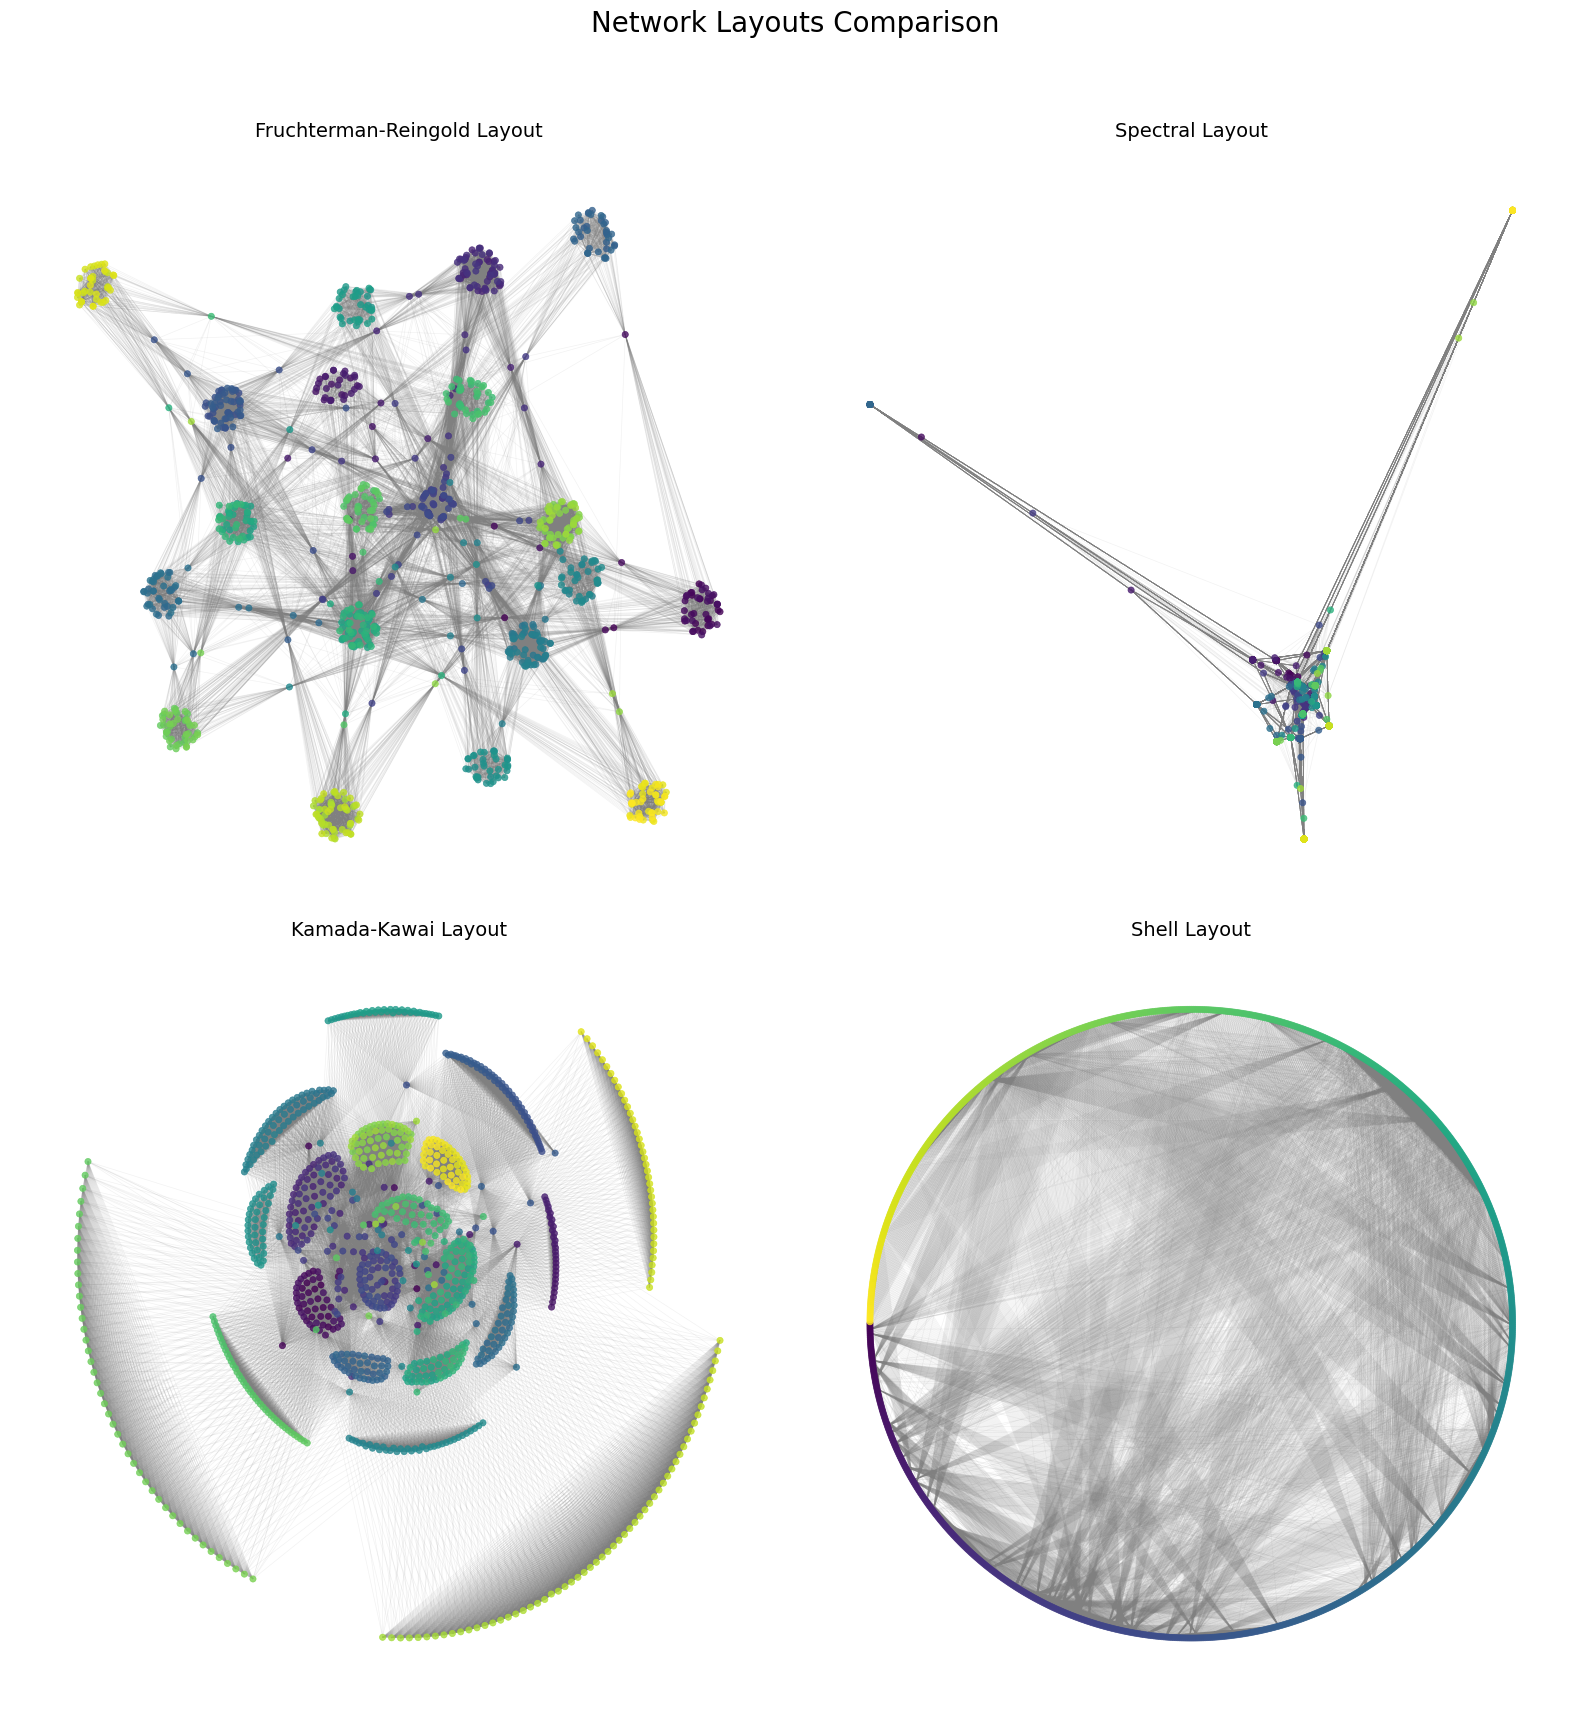

In [9]:
import matplotlib.pyplot as plt

# Set a consistent style
plt.style.use('ggplot')

fig, axs = plt.subplots(2, 2, figsize=(16, 18))
fig.suptitle("Network Layouts Comparison", fontsize=20)

layouts = [
    (spring_pos, "Fruchterman-Reingold Layout"),
    (spectral_pos, "Spectral Layout"),
    (kk_pos, "Kamada-Kawai Layout"),
    (shell_pos, "Shell Layout")
]

for ax, (pos, title) in zip(axs.ravel(), layouts):
    nx.draw_networkx_nodes(G, pos, ax=ax, node_color=range(len(G)), cmap=plt.cm.viridis, 
                           node_size=20, alpha=0.8)
    nx.draw_networkx_edges(G, pos, ax=ax, edge_color='gray', alpha=0.1, width=0.5)
    ax.set_title(title, fontsize=14)
    ax.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()